# OASIS INFOBYTE Data Analytics Internship

## Task 1 - Exploratory Data Analysis (EDA) on Retail Sales Data

Description:

In this project, you will work with a dataset containing information about retail sales. The goal is
to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can
help the retail business make informed decisions.

### 1. Data Loading and Cleaning

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load dataset
df = pd.read_csv('retail_sales_dataset.csv')

In [4]:
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
# Basic data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
# Check for missing values
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [8]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [10]:
# Check for duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [11]:
# Handle missing values 
df['Age'].fillna(df['Age'].median(), inplace=True)

In [12]:
# Overview of cleaned dataset
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


### 2. Descriptive Statistics

In [13]:
# Descriptive statistics for numeric columns
df[['Quantity', 'Price per Unit', 'Total Amount', 'Age']].describe()

,Quantity,Price per Unit,Total Amount,Age
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,2.514000,179.890000,456.000000,41.39200
std,1.132734,189.681356,559.997632,13.68143
min,1.000000,25.000000,25.000000,18.00000
25%,1.000000,30.000000,60.000000,29.00000
50%,3.000000,50.000000,135.000000,42.00000
75%,4.000000,300.000000,900.000000,53.00000
max,4.000000,500.000000,2000.000000,64.00000


In [14]:
# Mode for categorical variables
gender_mode = df['Gender'].mode()[0]
category_mode = df['Product Category'].mode()[0]
print(gender_mode)
print(category_mode)

Female
Clothing


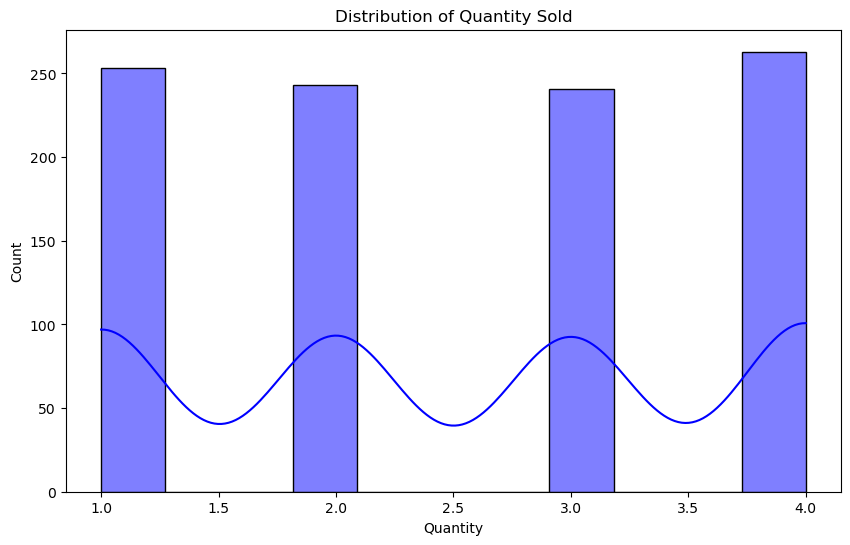

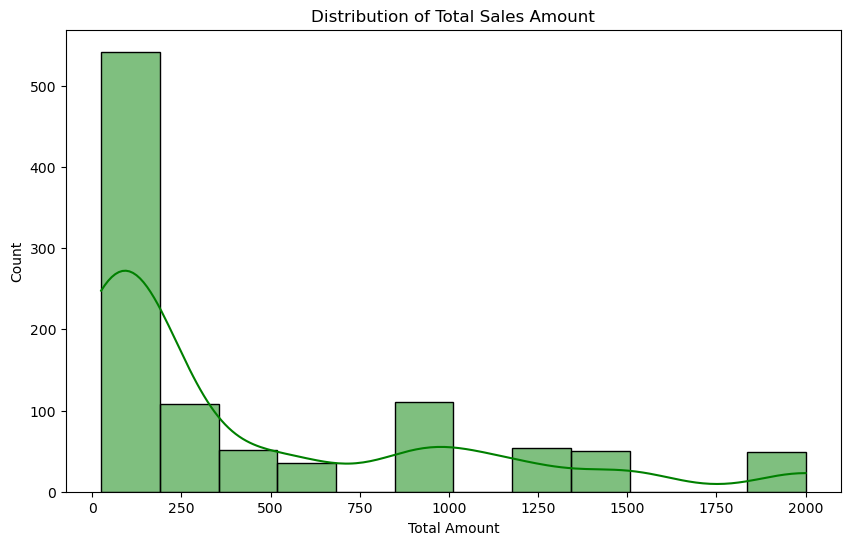

In [17]:
# Distribution of quantities and total amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], kde=True, color='blue')
plt.title('Distribution of Quantity Sold')

plt.figure(figsize=(10, 6))
sns.histplot(df['Total Amount'], kde=True, color='green')
plt.title('Distribution of Total Sales Amount')
plt.show()

### 3. Time Series Analysis

In [18]:
# Set Date as the index for time series analysis
df.set_index('Date', inplace=True)

In [19]:
# Resample sales data monthly (or weekly)
monthly_sales = df['Total Amount'].resample('M').sum()

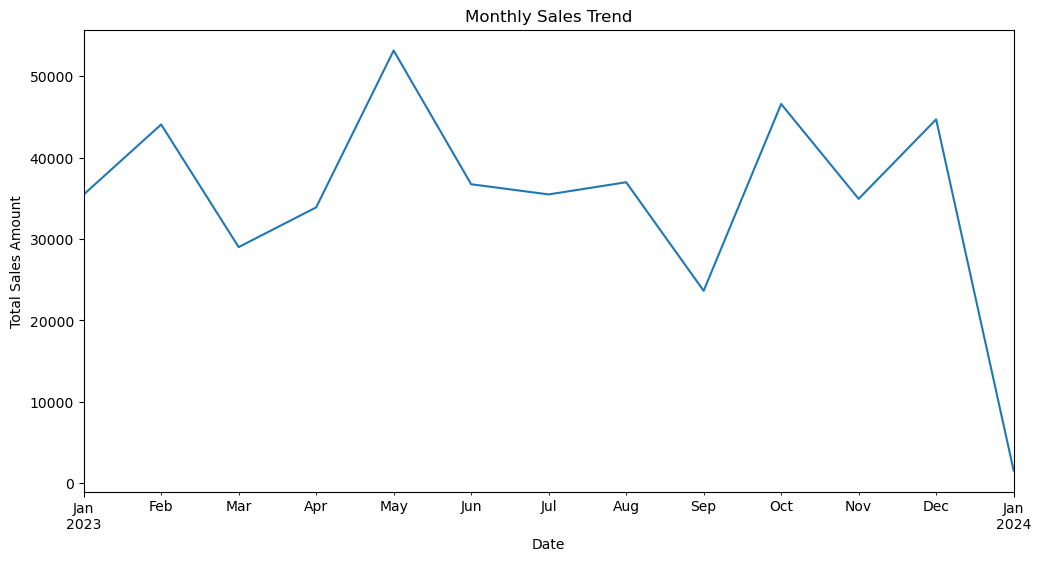

In [20]:
# Plot monthly sales trends
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales Amount')
plt.xlabel('Date')
plt.show()


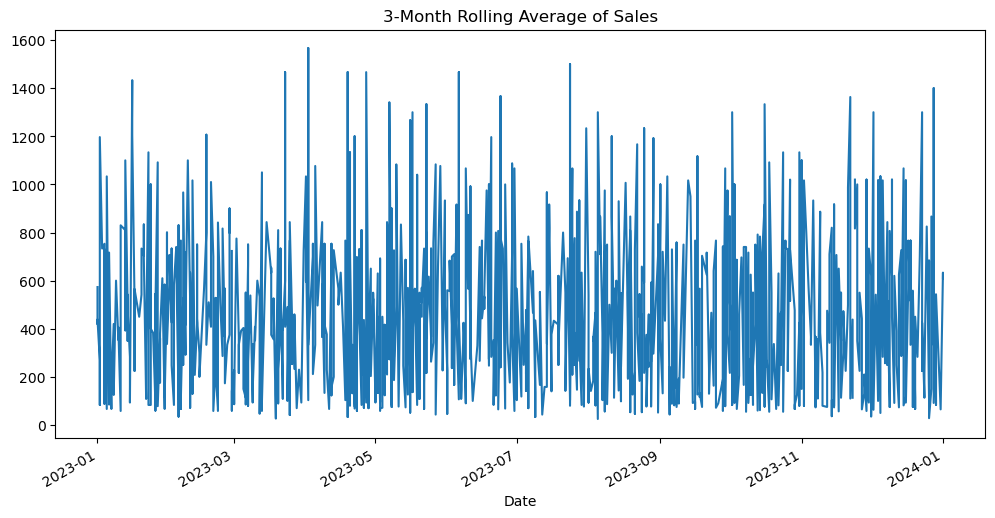

In [22]:
# Rolling average to smooth trends (window of 3 months)
df['Sales_Rolling'] = df['Total Amount'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
df['Sales_Rolling'].plot()
plt.title('3-Month Rolling Average of Sales')
plt.show()

### 4. Customer and Product Analysis

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


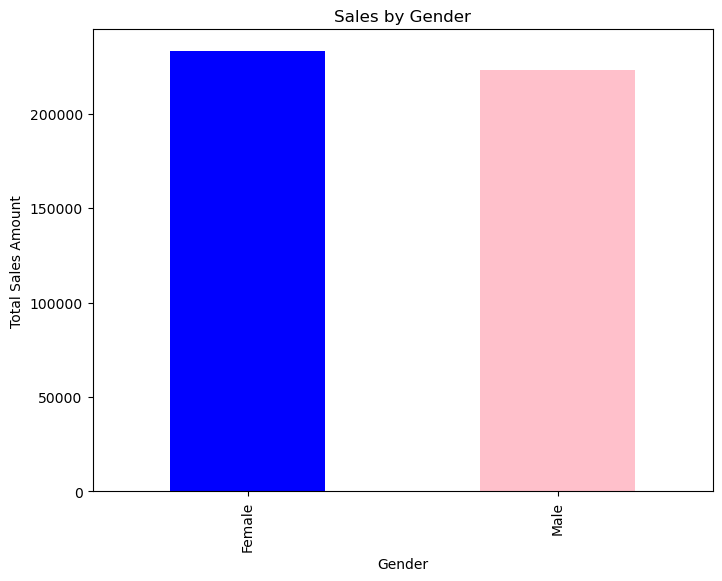

In [29]:
# Analyze sales by gender
sales_by_gender = df.groupby('Gender')['Total Amount'].sum()
print(sales_by_gender)

plt.figure(figsize=(8, 6))
sales_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Sales by Gender')
plt.ylabel('Total Sales Amount')
plt.show()

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64


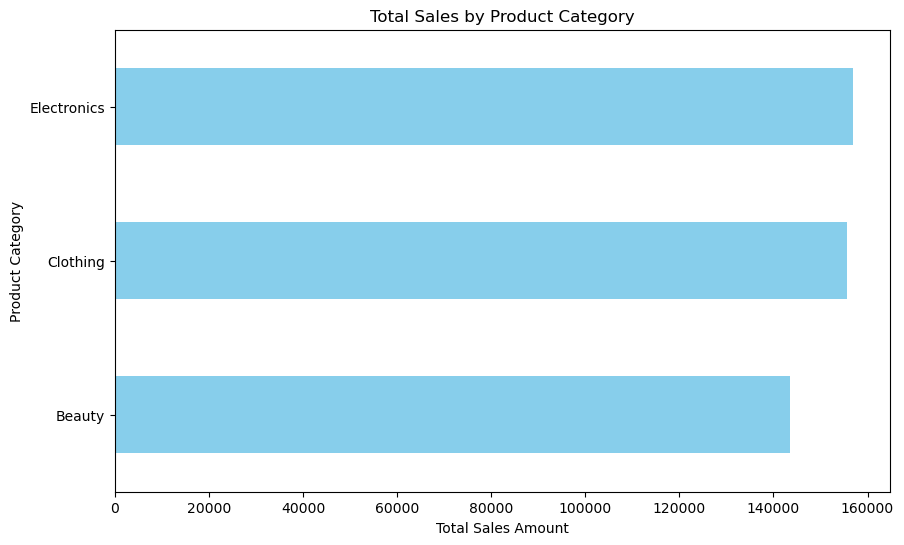

In [28]:
# Analyze sales by product category
sales_by_category = df.groupby('Product Category')['Total Amount'].sum()
print(sales_by_category)

plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='barh', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales Amount')
plt.show()


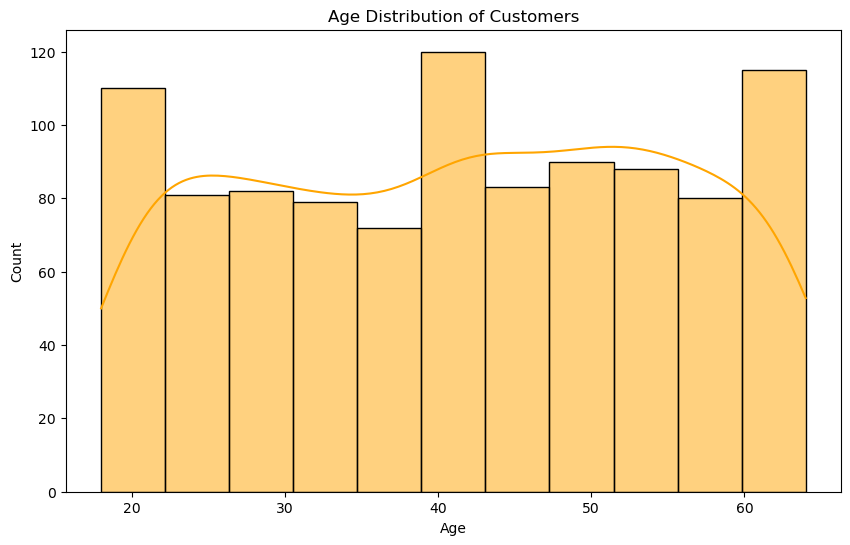

In [26]:
# Age distribution of customers
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='orange')
plt.title('Age Distribution of Customers')
plt.show()

In [27]:
# Top-selling products
top_products = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top Products are-")
print(top_products)

Top Products are-
Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64


Text(0.5, 1.0, 'Sales by Gender')

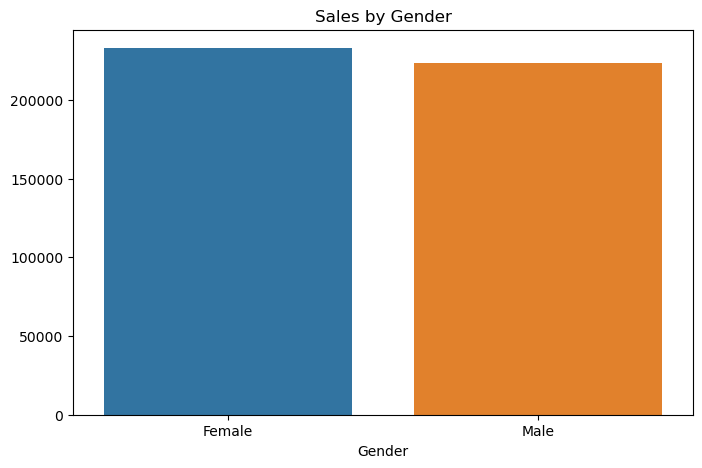

In [30]:
# Bar chart: Sales by gender
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_gender.index, y=sales_by_gender.values)
plt.title('Sales by Gender')

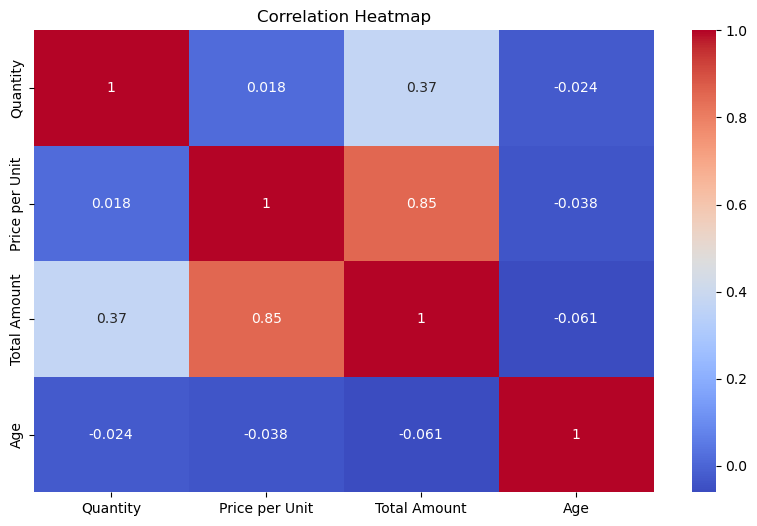

In [31]:
# Heatmap: Correlation between numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Quantity', 'Price per Unit', 'Total Amount', 'Age']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1400x800 with 0 Axes>

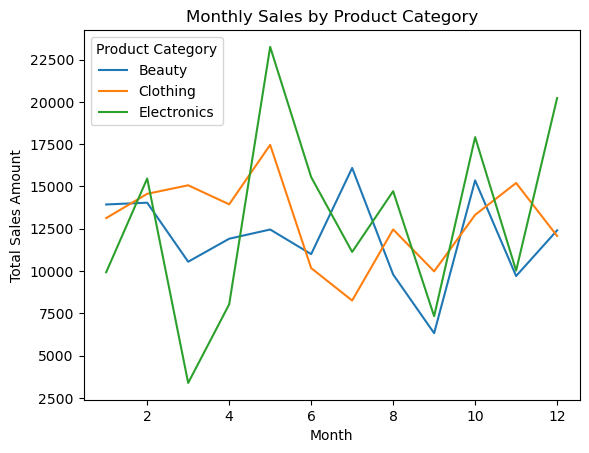

In [32]:
# Sales over time for each product category
plt.figure(figsize=(14, 8))
df.groupby([df.index.month, 'Product Category'])['Total Amount'].sum().unstack().plot()
plt.title('Monthly Sales by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.legend(title='Product Category')
plt.show()

Name- Aman Choudhary

Email address- amanchoudhary11189.ac@gmail.com

linkedin Profile- https://www.linkedin.com/in/aman-choudhary-61a9361a0/

Portfolio- https://amanchoudhary1997.github.io/amanchoudhary.github.io/